In [6]:
from bunkatopics import BunkaTopics
import pandas as pd


data = pd.read_csv("data/imdb.csv", index_col=[0])
data = data.sample(3000, random_state=42)


model = BunkaTopics(
    data,  # dataFrame
    text_var="description",  # Text Columns
    index_var="imdb",  # Index Column (Mandatory)
    extract_terms=True,  # extract Terms ?
    terms_embeddings=False,  # extract terms Embeddings?
    docs_embeddings=True,  # extract Docs Embeddings?
    embeddings_model="distiluse-base-multilingual-cased-v1",  # Chose an embeddings Model
    multiprocessing=True,  # Multiprocessing of Embeddings
    language="en",  # Chose between English "en" and French "fr"
    sample_size_terms=len(data),
    terms_limit=10000,  # Top Terms to Output
    terms_ents=True,  # Extract entities
    terms_ngrams=(1, 2),  # Chose Ngrams to extract
    terms_ncs=True,  # Extract Noun Chunks
    terms_include_pos=["NOUN", "PROPN", "ADJ"],  # Include Part-of-Speech
    terms_include_types=["PERSON", "ORG"],
    reduction = 2
)  # Include Entity Types

# Extract the topics


2022-10-20 15:11:48,536 - Extracting Terms...
100%|███████████████████████████████████████████████████████████████████████| 2990/2990 [00:21<00:00, 140.45it/s]
2022-10-20 15:12:10,204 - Extracting Docs Embeddings...
100%|████████████████████████████████████████████████████████████████████████| 2990/2990 [00:42<00:00, 70.47it/s]


UMAP(random_state=42, verbose=True)
Thu Oct 20 15:12:53 2022 Construct fuzzy simplicial set
Thu Oct 20 15:12:56 2022 Finding Nearest Neighbors
Thu Oct 20 15:12:56 2022 Finished Nearest Neighbor Search
Thu Oct 20 15:12:56 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Oct 20 15:12:59 2022 Finished embedding


In [7]:
#model.docs_embeddings = pd.read_csv('test/docs_embeddings.csv', index_col = [0])
#model.docs_embeddings.columns = model.docs_embeddings.columns.astype(int)

In [8]:
topics = model.get_clusters(
    topic_number=10,  # Number of Topics
    top_terms_included=1000,  # Compute the specific terms from the top n terms
    top_terms=2,  # Most specific Terms to describe the topics
    term_type="lemma",  # Use "lemma" of "text"
    ngrams=[1, 2],
    clusterer = 'kmeans'
)  # N-grams for Topic Representation


In [11]:
# Visualize the clusters. It is adviced to choose less that 5 terms - top_terms = 5 - to avoid overchanging the Figure

fig = model.visualize_clusters(scatter_size = "votes",
                               search=None, 
                               width=2000, 
                               height=2000, 
                               fit_clusters=False, 
                               density_plot=True)

UMAP(random_state=42, verbose=True)
Thu Oct 20 15:13:12 2022 Construct fuzzy simplicial set
Thu Oct 20 15:13:14 2022 Finding Nearest Neighbors
Thu Oct 20 15:13:15 2022 Finished Nearest Neighbor Search
Thu Oct 20 15:13:15 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Oct 20 15:13:17 2022 Finished embedding


In [12]:
import plotly
plotly.offline.plot(fig, filename='file.html')

'file.html'

In [ ]:
df_centroid = df_centroid.rename(
            columns={x: f"{x}" for x in range(len(self.reduction))}
        )

In [31]:
model.docs_embeddings.rename(
            columns={x: f"hi_{x}" for x in range(5)}
        )

,hi_0,hi_1,hi_2,hi_3,hi_4
tt0205177,10.556808,6.780193,-2.357491,3.255405,19.593454
tt2316801,10.577485,5.494169,-2.187083,3.623886,19.035162
tt0465234,11.373759,5.836631,-1.747064,1.143433,18.604332
tt1846589,12.425614,5.433035,-0.475418,1.830106,18.385320
tt0824758,10.889634,6.875579,-0.728363,3.037120,18.975033
...,...,...,...,...,...
tt0114924,9.900699,6.226686,-1.237627,3.416894,19.945272
tt0306434,11.849689,5.993051,-2.285040,1.725599,19.438456
tt3140100,10.943796,5.076976,-2.306098,1.895700,19.029780
tt0866437,10.327355,6.762121,-0.915831,3.582249,19.587193


In [24]:
res = model.get_centroid_documents(top_elements=5)
res['centroid_docs'].iloc[0].split(' || ')[2]

'The story recounts the early life of Genghis Khan who was a slave before going on to conquer half the world in 1206.'

'The story recounts the early life of Genghis Khan who was a slave before going on to conquer half the world in 1206.'

In [11]:
#model.df_fig.columns

In [11]:
centroids_emb = model.df_fig[["dim_1", "dim_2", "cluster_name_number"]]
centroids_emb = (
    centroids_emb.groupby("cluster_name_number").mean().reset_index()
)
centroids_emb.columns = ["centroid_name", "dim_1", "dim_2"]

In [12]:
df_fig_centroids = pd.concat([model.df_fig, centroids_emb])
df_fig_centroids

,0,1,2,3,4,cluster_name,topic_size,cluster_name_number,iw,original_title,...,genre_history,genre_documentary,genre_musical,genre_adventure,cluster,dim_1,dim_2,cluster_label,cluster_size,centroid_name
0,10.556808,6.780193,-2.357491,3.255405,19.593454,love | relationship | love story,363.0,5 - love | relationship | love story,0.0,Kevin & Perry Go Large,...,NaN,NaN,NaN,NaN,5,-10.546902,0.213664,5 - love | relationship | love story,5 | 363,NaN
1,10.577485,5.494169,-2.187083,3.623886,19.035162,mother | daughter | young woman,257.0,4 - mother | daughter | young woman,0.0,La belle et la bête,...,NaN,NaN,NaN,NaN,4,1.135596,-8.601707,4 - mother | daughter | young woman,4 | 257,NaN
2,11.373759,5.836631,-1.747064,1.143433,18.604332,police | cop | agent,376.0,2 - police | cop | agent,0.0,National Treasure: Book of Secrets,...,0.0,0.0,0.0,1.0,2,10.909959,16.175056,2 - police | cop | agent,2 | 376,NaN
3,12.425614,5.433035,-0.475418,1.830106,18.385320,alien | earth | scientist,423.0,3 - alien | earth | scientist,0.0,Hunter Killer,...,NaN,NaN,NaN,NaN,3,19.240294,-6.975182,3 - alien | earth | scientist,3 | 423,NaN
4,10.889634,6.875579,-0.728363,3.037120,18.975033,story | hollywood | star,176.0,6 - story | hollywood | star,0.0,The Last Station,...,NaN,NaN,NaN,NaN,6,0.430993,15.356056,6 - story | hollywood | star,6 | 176,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.567255,1.067900,NaN,NaN,5 - love | relationship | love story
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.061245,15.095276,NaN,NaN,6 - story | hollywood | star
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.637826,-0.081146,NaN,NaN,7 - murder | killer | serial killer
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.838988,1.525157,NaN,NaN,8 - family | christmas | town


In [17]:
import plotly.express as px

In [24]:
fig = px.scatter(
                model.df_fig,
                x="dim_1",
                y="dim_2",
                size = model.df_fig['votes'],
                width=1000,
                height=1000,
            )

In [ ]:
# Visualize the clusters. It is adviced to choose less that 5 terms - top_terms = 5 - to avoid overchanging the Figure

fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=True)
fig.show()

In [ ]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=False)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:34:13 2022 Construct fuzzy simplicial set
Sat Jun 25 10:34:13 2022 Finding Nearest Neighbors
Sat Jun 25 10:34:13 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:34:13 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:34:28 2022 Finished embedding


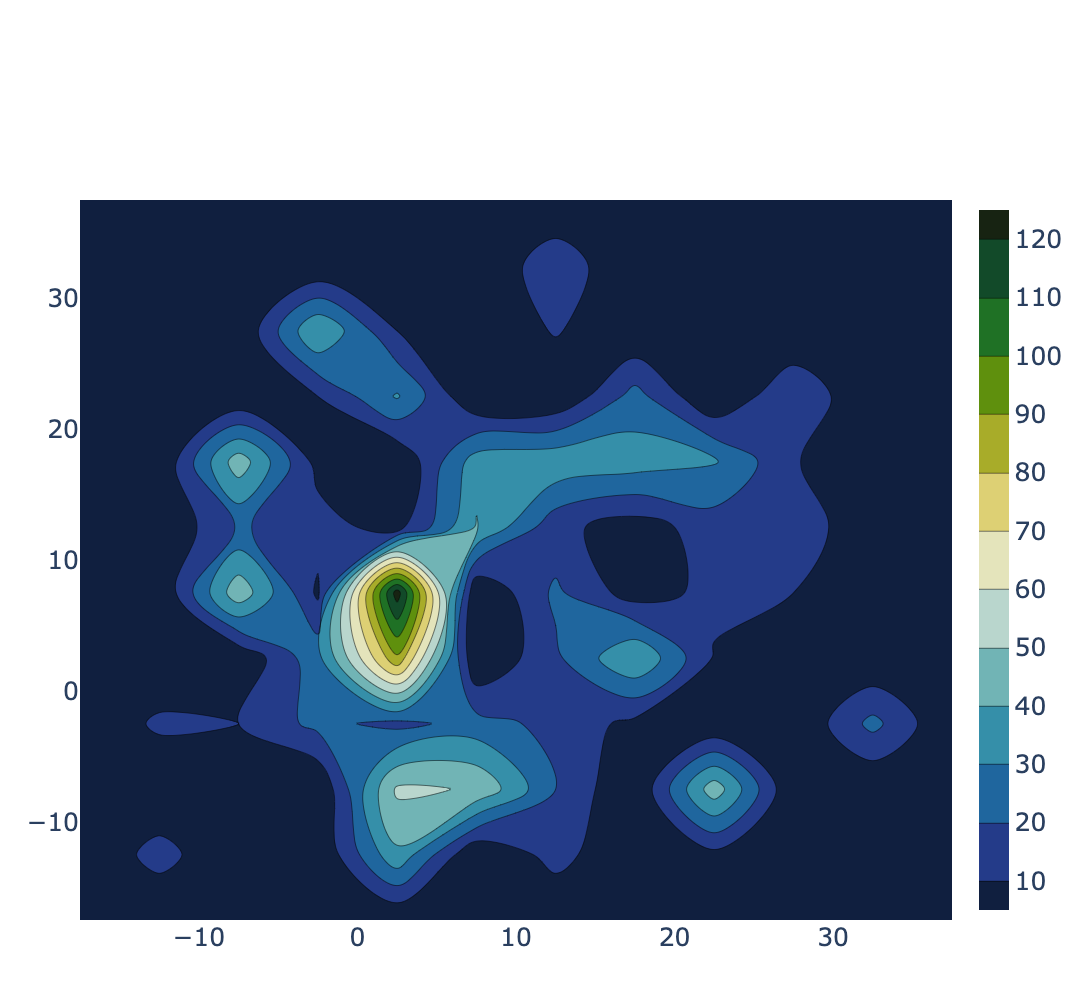

In [9]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=True, density_plot=True)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:34:44 2022 Construct fuzzy simplicial set
Sat Jun 25 10:34:45 2022 Finding Nearest Neighbors
Sat Jun 25 10:34:45 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:34:45 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:34:47 2022 Finished embedding


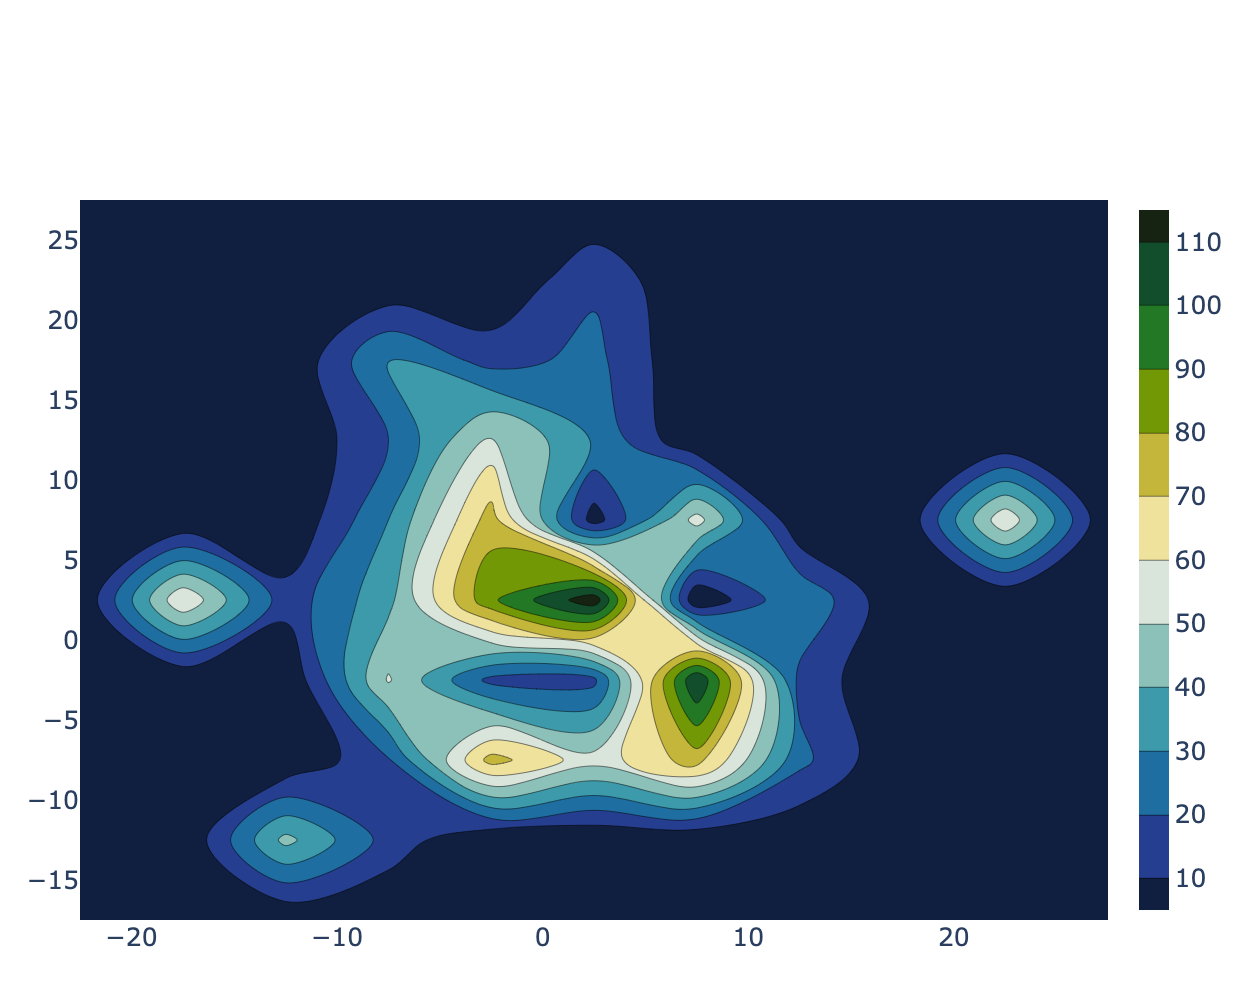

In [10]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=True)
fig.show()